<a href="https://colab.research.google.com/github/salomepolanco/JuegoPPT/blob/master/CodoJambu_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Codo de Jambú
Para hallar k ( cantidad de clústers )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
%matplotlib inline

Importamos los datos

In [5]:
data = pd.read_csv("/content/sriVentas.csv", sep=";", encoding="ISO-8859-1")

Vamos a ver las caracteristicas que tiene

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23684 entries, 0 to 23683
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ANIO                     23684 non-null  int64 
 1   MES                      23684 non-null  int64 
 2   CODIGO_SECTOR_N1         23684 non-null  object
 3   PROVINCIA                23684 non-null  object
 4   CANTON                   23684 non-null  object
 5   VENTAS_NETAS_TARIFA_12   23684 non-null  object
 6   VENTAS_NETAS_TARIFA_0    23684 non-null  object
 7   EXPORTACIONES            23684 non-null  object
 8   COMPRAS_NETAS_TARIFA_12  23684 non-null  object
 9   COMPRAS_NETAS_TARIFA_0   23684 non-null  object
 10  IMPORTACIONES            23684 non-null  object
 11  COMPRAS_RISE             23684 non-null  object
 12  TOTAL_COMPRAS            23684 non-null  object
 13  TOTAL_VENTAS             23684 non-null  object
dtypes: int64(2), object(12)
memory usage: 

Vimos que los datos no fueron cargados correctamente. Es necesario depurarlos.

In [7]:

# Especificar los tipos de datos de varias columnas en un diccionario
dtype_dict = {
    'VENTAS_NETAS_TARIFA_12': float,
    'VENTAS_NETAS_TARIFA_0': float,
    'EXPORTACIONES': float,
    'COMPRAS_NETAS_TARIFA_12': float,
    'COMPRAS_NETAS_TARIFA_0': float,
    'IMPORTACIONES': float,
    'COMPRAS_RISE': float,
    'TOTAL_COMPRAS': float,
    'TOTAL_VENTAS': float,
}

# Leer el archivo CSV con los tipos de datos especificados
data = pd.read_csv("/content/sriVentas.csv", sep=";", encoding="ISO-8859-1", thousands='.', decimal=',', dtype=dtype_dict)

data.info()  # Verificar los tipos de datos cargados correctamente


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23684 entries, 0 to 23683
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANIO                     23684 non-null  int64  
 1   MES                      23684 non-null  int64  
 2   CODIGO_SECTOR_N1         23684 non-null  object 
 3   PROVINCIA                23684 non-null  object 
 4   CANTON                   23684 non-null  object 
 5   VENTAS_NETAS_TARIFA_12   23684 non-null  float64
 6   VENTAS_NETAS_TARIFA_0    23684 non-null  float64
 7   EXPORTACIONES            23684 non-null  float64
 8   COMPRAS_NETAS_TARIFA_12  23684 non-null  float64
 9   COMPRAS_NETAS_TARIFA_0   23684 non-null  float64
 10  IMPORTACIONES            23684 non-null  float64
 11  COMPRAS_RISE             23684 non-null  float64
 12  TOTAL_COMPRAS            23684 non-null  float64
 13  TOTAL_VENTAS             23684 non-null  float64
dtypes: float64(9), int64(2

vemos como la data fue modificada de tipo correctamente.

Vamos a ver sus primeros registros

In [8]:
data.head()

,ANIO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,2023,1,X,PICHINCHA,QUITO,16158.93,145.00,0.00,7241.00,0.00,0.00,0.00,7241.00,16303.93
1,2023,2,O,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,43729.24,1306637.38,0.00,3007450.23,211645.94,0.00,18751.64,3237847.81,1350366.62
2,2023,2,A,AZUAY,PAUTE,58705.88,35318.03,263428.69,3117.69,206927.08,0.00,20.00,210064.77,357452.60
3,2023,3,M,BOLIVAR,CHILLANES,51206.38,2349.98,0.00,16696.00,1125.27,0.00,0.00,17821.27,53556.36
4,2023,4,M,TUNGURAHUA,SAN PEDRO DE PELILEO,840519.23,20198.77,0.00,824892.16,20232.31,2788.55,251.95,848164.97,860718.00


La primera columna de Anio no es necesaria para este estudio, puesto que todo el dataset es del Anio 2023.
   

In [9]:
data_variables = data.drop(['ANIO', 'MES', 'CODIGO_SECTOR_N1', 'PROVINCIA', 'CANTON'], axis=1)


Quitamos las variables categoricas, y nos quedamos solo con las variables numericas continuas.

In [10]:
data_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23684 entries, 0 to 23683
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VENTAS_NETAS_TARIFA_12   23684 non-null  float64
 1   VENTAS_NETAS_TARIFA_0    23684 non-null  float64
 2   EXPORTACIONES            23684 non-null  float64
 3   COMPRAS_NETAS_TARIFA_12  23684 non-null  float64
 4   COMPRAS_NETAS_TARIFA_0   23684 non-null  float64
 5   IMPORTACIONES            23684 non-null  float64
 6   COMPRAS_RISE             23684 non-null  float64
 7   TOTAL_COMPRAS            23684 non-null  float64
 8   TOTAL_VENTAS             23684 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [11]:
data_variables.describe()

,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
count,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04,2.368400e+04
mean,2.473533e+06,1.619348e+06,6.252307e+05,1.881306e+06,1.198889e+06,5.260257e+05,3.368030e+04,3.671933e+06,4.719197e+06
std,4.552437e+07,1.551707e+07,1.236183e+07,2.729828e+07,1.326491e+07,1.215438e+07,2.704923e+05,5.088883e+07,6.952504e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.527125e+02,2.000000e+00,0.000000e+00,1.337695e+03,1.161950e+02,0.000000e+00,0.000000e+00,2.304088e+03,2.466880e+03
50%,9.674550e+03,8.345200e+03,0.000000e+00,2.238651e+04,6.361245e+03,0.000000e+00,2.683500e+01,4.016301e+04,4.023811e+04
75%,1.161908e+05,1.211673e+05,0.000000e+00,1.929247e+05,7.441427e+04,0.000000e+00,5.187207e+03,3.265281e+05,3.303448e+05
max,2.509982e+09,7.636915e+08,7.036877e+08,1.512235e+09,6.857974e+08,5.936501e+08,1.357111e+07,2.510639e+09,3.743610e+09


En la estadistica presentada anteriormente, se pueden ver:

el promedio mean muy distinto de los valores de minimo y maximo que se
presentan. Por tanto, se debe hacer una conversion para que estos valores esten en el mismo rango.

In [12]:
data_normalizada = (data_variables-data_variables.min())/(data_variables.max()-data_variables.min())
data_normalizada

,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,6.437866e-06,1.898672e-07,0.000000,4.788276e-06,0.000000,0.000000,0.000000,2.884127e-06,4.355136e-06
1,1.742213e-05,1.710949e-03,0.000000,1.988745e-03,0.000309,0.000000,0.001382,1.289651e-03,3.607125e-04
2,2.338896e-05,4.624646e-05,0.000374,2.061643e-06,0.000302,0.000000,0.000001,8.366986e-05,9.548341e-05
3,2.040109e-05,3.077133e-06,0.000000,1.104061e-05,0.000002,0.000000,0.000000,7.098302e-06,1.430608e-05
4,3.348706e-04,2.644886e-05,0.000000,5.454787e-04,0.000030,0.000005,0.000019,3.378284e-04,2.299166e-04
...,...,...,...,...,...,...,...,...,...
23679,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
23680,5.358348e-06,0.000000e+00,0.000000,1.155105e-06,0.000011,0.000000,0.000000,3.794541e-06,3.592618e-06
23681,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
23682,4.980115e-07,6.547146e-10,0.000000,1.911078e-07,0.000000,0.000000,0.000000,1.151102e-07,3.340359e-07


De esta manera la data tendra un valor min igual a 0 y un maximo igual a 1

In [13]:
data_normalizada.describe()

,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
count,2.368400e+04,2.368400e+04,23684.000000,2.368400e+04,2.368400e+04,23684.000000,23684.000000,2.368400e+04,2.368400e+04
mean,9.854783e-04,2.120422e-03,0.000889,1.244056e-03,1.748167e-03,0.000886,0.002482,1.462549e-03,1.260601e-03
std,1.813732e-02,2.031851e-02,0.017567,1.805161e-02,1.934232e-02,0.020474,0.019931,2.026928e-02,1.857166e-02
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.006830e-07,2.618859e-09,0.000000,8.845812e-07,1.694305e-07,0.000000,0.000000,9.177297e-07,6.589576e-07
50%,3.854429e-06,1.092745e-05,0.000000,1.480359e-05,9.275691e-06,0.000000,0.000002,1.599713e-05,1.074848e-05
75%,4.629148e-05,1.586600e-04,0.000000,1.275758e-04,1.085077e-04,0.000000,0.000382,1.300578e-04,8.824234e-05
max,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00


se verifican el min 0 y el max 1. Centralizacion

CODO DE JAMBU

In [14]:
wcss = []  # creación lista vacía para almacenar los valores wcss que se vayan creando

for i in range (1, 10):   #1 al 9 clusters
  kmeans = KMeans (n_clusters=i, max_iter=300)  # creo un obj llamado kmeans, utilizo la funcion KMeans, la cantidad de clusters irá cambiando. max interaciones 300
  kmeans.fit(data_normalizada)  #Aplico KMeand al objeto creado y le paso mi var
  wcss.append(kmeans.inertia_) # le agrego la inercia a la lista wcss


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

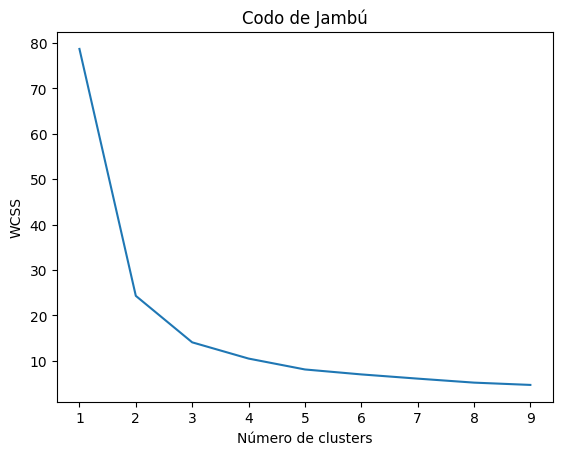

In [15]:
plt.plot(range(1, 10), wcss)   # creo una gráfica bidimensional. Eje x va de 1 al 9 y Eje y toma los valores wcss
plt.title("Codo de Jambú")  # título de la gráfica
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")  # WCSS es un indicador de que tan similares son los individuos dentro de los clusters.
plt.show()


Se ve que en el plot del codo de Jambu que a medida que aumentan los clusters WCSS disminuye. Se pretende un WCSS minimo.


Si tomamos 9 clusters que tiene el menor valor de WCSS, serían demasiadas particiones, entonces tomamos un valor objetivo, donde WCSS deje de disminuir de manera drástica. En este caso clusters=3.

# Método KMeans


Se aplica KMeans al dataset para hacer la clusterización con el k obtenido

In [16]:
clustering = KMeans(n_clusters = 3, max_iter = 300) # Creamos el modelo y lo guardamos en el objeto llamado clustering
clustering.fit(data_normalizada) # Aplica el modelo a nuestra bdd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Ahora debemos agregar la clasificación al archivo original. No olvidar que es data_variables puesto que hemos eliminado las categóricas que no aportan en este estudio.

In [17]:
data_variables['KMeans_Clusters'] = clustering.labels_   # Creamos una col KMean_Clusters dentro del objeto data. Se debe incluir labels dentro del obj clustering
data_variables.head(10)

,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS,KMeans_Clusters
0,16158.93,145.00,0.00,7241.00,0.00,0.00,0.00,7241.00,16303.93,0
1,43729.24,1306637.38,0.00,3007450.23,211645.94,0.00,18751.64,3237847.81,1350366.62,0
2,58705.88,35318.03,263428.69,3117.69,206927.08,0.00,20.00,210064.77,357452.60,0
3,51206.38,2349.98,0.00,16696.00,1125.27,0.00,0.00,17821.27,53556.36,0
4,840519.23,20198.77,0.00,824892.16,20232.31,2788.55,251.95,848164.97,860718.00,0
5,43095.30,226.00,0.00,26548.47,692.38,0.00,0.00,27240.85,43321.30,0
6,594361.58,350988.75,0.00,546106.58,274490.89,0.00,32762.36,853359.83,945350.33,0
7,3630661.14,5839005.39,3334200.91,3836233.87,7957322.39,0.00,93087.72,11886643.98,12803867.44,0
8,344418.59,800093.17,0.00,413074.93,429044.49,0.00,36683.93,878803.35,1144511.76,0
9,25181.12,1533921.21,284154.50,210628.94,1200114.41,0.00,41487.31,1452230.66,1843256.83,0


Como podemos ver, ya se anexó la columna KMeans_Clusters

In [18]:
valores_unicos = data_variables['KMeans_Clusters'].unique()
print(valores_unicos)

[0 2 1]


Verificamos con la función unique, para ver qué valores contiene la columna KMeans_Clusters

# Reducción de variables por el método PCA

Aqui vamos a ver los clusters formados

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # creo un modelo PCA indicandole que quiero los 2 componentes principales y guardo en pca objeto
pca_data = pca.fit_transform(data_normalizada) # le aplico a mi data normalizada
pca_data_df = pd.DataFrame(data = pca_data, columns = ['Componente_1', 'Componente_2']) # nuevo dataset con los 2 mejores componentes
pca_nombres_data = pd.concat([pca_data_df, data_variables[['KMeans_Clusters']]], axis=1) # concateno las col guardo en pca_nombres_data

pca_nombres_data

,Componente_1,Componente_2,KMeans_Clusters
0,-0.004350,0.001358,0
1,-0.001968,0.000402,0
2,-0.004063,0.001305,0
3,-0.004337,0.001363,0
4,-0.003841,0.001584,0
...,...,...,...
23679,-0.004356,0.001354,0
23680,-0.004347,0.001350,0
23681,-0.004356,0.001354,0
23682,-0.004355,0.001354,0


Se ve una matriz ya con los 2 mejores componentes y la columna KMeans al que pertenecen

<function matplotlib.pyplot.show(close=None, block=None)>

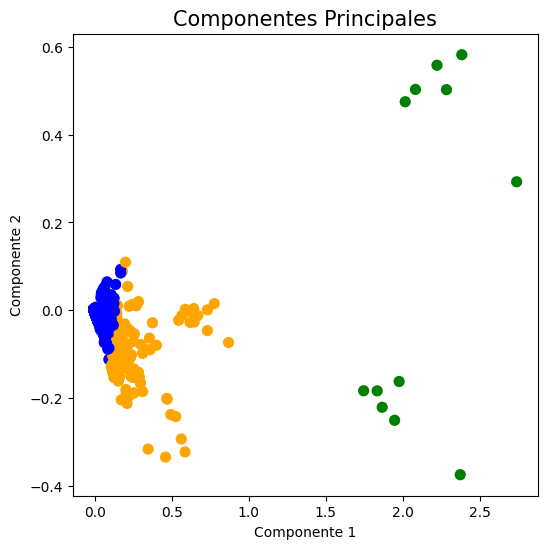

In [22]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 10)
ax.set_ylabel('Componente 2', fontsize = 10)
ax.set_title('Componentes Principales', fontsize = 15)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_data.Componente_1, y = pca_nombres_data.Componente_2, c = color_theme[pca_nombres_data.KMeans_Clusters], s=50)

plt.show

In [25]:
data_variables.to_csv(r'C:\Users\ospolanco\Documents\sexto\DATA ANALYSIS\SRI ventas\KMeansResultado.csv', index=False)
